<a href="https://colab.research.google.com/github/RamanEbrahimi/MIS_ML_Project/blob/main/MIS_Project2_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Management Information Systems - Project #2
###### Team members: Raman Ebrahimi, Aref Roshan, Mohammad (Hesan) Samimi

Importing libraries we need


In [64]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

Loading data and getting information about our data. 
We loaded the data on a Google Colab server, therefore we don't need to use it's path. To run 
on Windows, MacOS, or Linux you need to use he files' path. You can get their path using Terminal 
or the file itself.

In [ ]:
df = pd.read_csv('Heart.csv')
df.head(10) # printing top 10 rows of our dataframe

# df.describe() # this command gives us some statistical information from our dataframe. 

# df.info() # this command gives us information about dataframe's structure. It's output is written below:
# RangeIndex: 303 entries, 0 to 302
# Data columns (total 14 columns):
#  #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   age       303 non-null    int64  
#  1   sex       303 non-null    int64  
#  2   cp        303 non-null    int64  
#  3   trestbps  303 non-null    int64  
#  4   chol      303 non-null    int64  
#  5   fbs       303 non-null    int64  
#  6   restecg   303 non-null    int64  
#  7   thalach   303 non-null    int64  
#  8   exang     303 non-null    int64  
#  9   oldpeak   303 non-null    float64
#  10  slope     303 non-null    int64  
#  11  ca        303 non-null    int64  
#  12  thal      303 non-null    int64  
#  13  target    303 non-null    int64  
# dtypes: float64(1), int64(13)
# memory usage: 33.3 KB

Using dealing with missing values.

Result:

    RangeIndex: 303 entries, 0 to 302
    Data columns (total 14 columns):
    #   Column    Non-Null Count  Dtype  
    ---  ------    --------------  -----  
    0   age       303 non-null    int64  
    1   sex       303 non-null    int64  
    2   cp        303 non-null    int64  
    3   trestbps  303 non-null    int64  
    4   chol      303 non-null    int64  
    5   fbs       303 non-null    int64  
    6   restecg   303 non-null    int64  
    7   thalach   303 non-null    int64  
    8   exang     303 non-null    int64  
    9   oldpeak   303 non-null    float64
    10  slope     303 non-null    int64  
    11  ca        303 non-null    int64  
    12  thal      303 non-null    int64
    13  target    303 non-null    int64  
    dtypes: float64(1), int64(13)
    memory usage: 33.3 KB

Result is the same, meaning we didn't find any null values.

In [ ]:
if df.empty:
  df.dropna()
df.info()

##Drawing heatmap using Seaborn library.


> Result: Let's say if the absolute value of correlation goes higher than 0.4, we say they're correlated.
As we can see, these pair are correlated:
(target, cp): 0.43 - (target, thalach): 0.42 - (target, exang): -0.44 - (target, oldpeak): -0.43
(slope, oldpeak): -0.58
(thalach, age): -0.4





In [ ]:
plt.figure(figsize = (16, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='YlGnBu')
plt.show() 

##Defining X and Y values and normalizing X values using StandardScaler().
* Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [ ]:
df.columns #['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           #  'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
X_values = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values # First 13 columns
Y_values = df[['target']].values # Last column

# Normalization
scaler = preprocessing.StandardScaler().fit(X_values)
X_values_normalized = scaler.transform(X_values.astype(float))
# X_values_normalized[:1]

##Now by having normalized X values and Y values, we will split our data to train set and test set.


* Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

* It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

* This will provide a more accurate evaluation on 
out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.



In [56]:
''' Firstly we use 20 percent and then we use 10 percent '''
X_train, X_test, y_train, y_test = train_test_split( X_values_normalized, Y_values, test_size=0.2, random_state=4)
print ('Train set shape for 20 percent:', X_train.shape,  y_train.shape)
print ('Test set shape for 20 percent:', X_test.shape,  y_test.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split( X_values_normalized, Y_values, test_size=0.1, random_state=4)
print ('\n\nTrain set shape for 10 percent:', X_train2.shape,  y_train2.shape)
print ('Test set shape for 10 percent:', X_test2.shape,  y_test2.shape)

X_train3, X_test3, y_train3, y_test3 = train_test_split( X_values_normalized, Y_values, test_size=0.5, random_state=4)
print ('\n\nTrain set shape for 50 percent:', X_train3.shape,  y_train3.shape)
print ('Test set shape for 50 percent:', X_test3.shape,  y_test3.shape)

Train set shape for 20 percent: (242, 13) (242, 1)
Test set shape for 20 percent: (61, 13) (61, 1)


Train set shape for 10 percent: (272, 13) (272, 1)
Test set shape for 10 percent: (31, 13) (31, 1)


Train set shape for 50 percent: (151, 13) (151, 1)
Test set shape for 50 percent: (152, 13) (152, 1)


# Classification using K-Nearest Neighbors or KNN

Let's start with k = 4

Result: 

    Second train set accuracy (10%):  0.8566176470588235
    Second test set accuracy (10%):  0.7741935483870968
    First train set accuracy (20%):  0.859504132231405
    First test set accuracy (20%):  0.8032786885245902
    Third train set accuracy (50%):  0.8807947019867549
    Third test set accuracy (50%):  0.8157894736842105
* First train set accuracy is slightly higher, but first test set accuracy is considerably higher, as we expected. If we used more data for training, the accuracy would be even more, but we would risk overfitting our data. In the thirs test set and train set, we observe that our train set accuracy goes to 88% but our test set accuracy does not grow as before.

In [ ]:
''' Training '''
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train2, y_train2)
neigh3 = KNeighborsClassifier(n_neighbors = k).fit(X_train3, y_train3)

''' Predicting '''
yhat = neigh.predict(X_test)
# yhat[0:5]

yhat2 = neigh.predict(X_test2)
# yhat2[0:5]

yhat3 = neigh.predict(X_test3)
# yhat3[0:5]

''' Accuracy '''
print('First train set accuracy (20%): ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('First test set accuracy (20%): ', metrics.accuracy_score(y_test, yhat))
print('\n\nSecond train set accuracy (10%): ', metrics.accuracy_score(y_train2, neigh.predict(X_train2)))
print('Second test set accuracy (10%): ', metrics.accuracy_score(y_test2, yhat2))
print('\n\nThird train set accuracy (50%): ', metrics.accuracy_score(y_train3, neigh.predict(X_train3)))
print('Third test set accuracy (50%): ', metrics.accuracy_score(y_test3, yhat3))

##Now we use a 'For' loop to consider other values for K. 
##We consider values from 1 to 20.

Result:

    array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869, 0.81967213, 0.83606557, 0.81967213, 0.81967213, 0.85245902, 0.81967213, 0.83606557, 0.81967213, 0.83606557, 0.80327869, 0.81967213, 0.80327869, 0.80327869, 0.83606557])

As we can see, K = 10 is a good choice for K.

We will check it just to make sure.

Checked:

    Check train set accuracy (20%):  0.8388429752066116
    Check test set accuracy (20%):  0.8524590163934426

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n - 1]=np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

print('The best accuracy was with', mean_acc.max(), 'with k =', mean_acc.argmax() + 1)


Checking k = 10

In [ ]:
''' Training '''
k = 10
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

''' Predicting '''
yhat = neigh.predict(X_test)
# yhat[0:5]

''' Accuracy '''
print('Check train set accuracy (20%): ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Check test set accuracy (20%): ', metrics.accuracy_score(y_test, yhat))

## Plotting different Ks

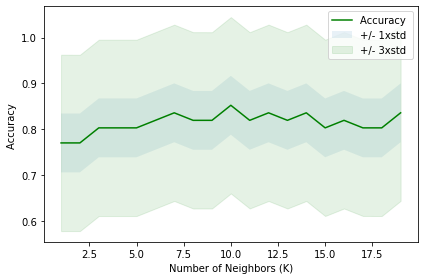

In [61]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color='green')
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## CNF matrix, percision, recall, and F1_score

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix 𝐶 is such that 𝐶_{i, j} is equal to the number of observations known to be in group 𝑖 and predicted to be in group 𝑗.

Thus in binary classification, the count of true negatives is 𝐶_{0, 0}, false negatives is 𝐶_{1, 0}, true positives is 𝐶_{1, 1} and false positives is 𝐶_{0, 1}.

Result:

    array([[18,  7], [ 3, 33]])

As we can see, True Positive (TP) is 18, False Negative (FN) is 7, False Positive (FP) is 3, and True Negative (TN) is 33.

In [65]:
KNN_cnf_matrix = confusion_matrix(y_test, yhat)
KNN_cnf_matrix

array([[18,  7],
       [ 3, 33]])

F-score: It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. Precision is also known as positive predictive value, and recall is also known as sensitivity in diagnostic binary classification.

The F1 score is the harmonic mean of the precision and recall.

Precision: TP / (TP + FP)

Recall: TP / (TP + FN)

F1-score: 2.(Precision.Recall) / (Precision + Recall)

A good F1-score is one which is close to one. Therefore, our first test and train sets are better than other two. Same goe with Precision and Recall.

In [ ]:
print(classification_report(y_test, yhat), '\n\n')
print(classification_report(y_test2, yhat2), '\n\n')
print(classification_report(y_test3, yhat3))

# Decision Tree Implementation

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.


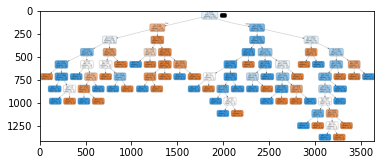

In [83]:
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus


X = X_values
Y = Y_values
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
# tree.plot_tree(clf)

# Plotting high quality and saving as pdf file.
# dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render('decisiontree') # as pdf

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png') # as png
imgplot = plt.imshow(img)
plt.show()